In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import yfinance as yt
from pandas_datareader import data as wb

plt.rcParams['figure.figsize'] = 12,8

import seaborn as sns

In [2]:
ticker = ["BBRI.JK","PWON.JK", "KBLI.JK"]
data = pd.DataFrame()
for i in ticker:
    data[i] = wb.DataReader(i, data_source = "yahoo", start = "2014-01-01")["Close"]

In [3]:
data.head()

,BBRI.JK,PWON.JK,KBLI.JK
Date,,,
2014-01-02,1460.0,280.0,142.0
2014-01-03,1450.0,280.0,150.0
2014-01-06,1405.0,269.0,142.0
2014-01-07,1415.0,264.0,138.0
2014-01-08,1435.0,275.0,138.0


In [4]:
data.tail()

,BBRI.JK,PWON.JK,KBLI.JK
Date,,,
2020-07-24,3090.0,424.0,412.0
2020-07-27,3150.0,428.0,400.0
2020-07-28,3140.0,426.0,400.0
2020-07-29,3120.0,424.0,396.0
2020-07-30,3160.0,424.0,380.0


### Task 1 : Normalize Data

In [5]:
data_normalize = data.div(data.iloc[0]).mul(100).copy()

In [6]:
data_normalize.head()

,BBRI.JK,PWON.JK,KBLI.JK
Date,,,
2014-01-02,100.000000,100.000000,100.000000
2014-01-03,99.315068,100.000000,105.633803
2014-01-06,96.232877,96.071429,100.000000
2014-01-07,96.917808,94.285714,97.183099
2014-01-08,98.287671,98.214286,97.183099


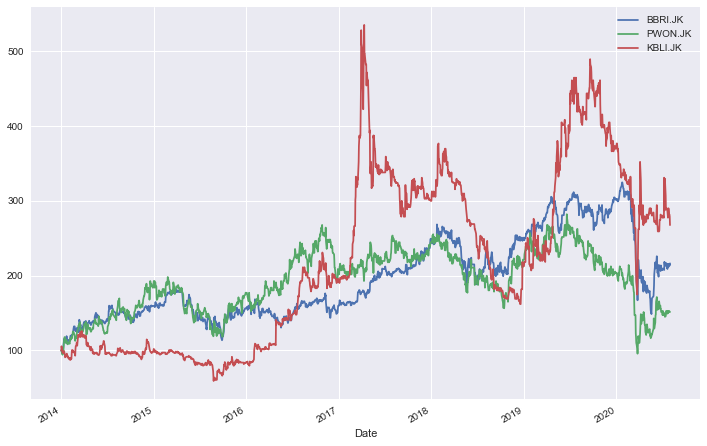

In [7]:
data_normalize.plot()

#### Simple Rate of Return (Pct_change)
digunakan ketika berhadapan dengan banyak asset dalam jangka waktu yang sama

#### Log Rate of Return (np.log)
digunakan ketika membuat perhitungan tentang satu asset dari waktu ke waktu

### Task 2 : Return Daily in % (Simple Return and LOG)

Simple Return

In [8]:
return_daily = data.pct_change(1).mul(100).dropna().copy()

In [9]:
return_daily

,BBRI.JK,PWON.JK,KBLI.JK
Date,,,
2014-01-03,-0.684932,0.000000,5.633803
2014-01-06,-3.103448,-3.928571,-5.333333
2014-01-07,0.711744,-1.858736,-2.816901
2014-01-08,1.413428,4.166667,0.000000
2014-01-09,2.090592,-2.181818,-0.724638
...,...,...,...
2020-07-24,-1.592357,-0.469484,2.487562
2020-07-27,1.941748,0.943396,-2.912621
2020-07-28,-0.317460,-0.467290,0.000000


Log

In [10]:
log_return = np.log(data/data.shift(1)).mul(100).dropna().copy()

In [11]:
log_return 

,BBRI.JK,PWON.JK,KBLI.JK
Date,,,
2014-01-03,-0.687288,0.000000,5.480824
2014-01-06,-3.152625,-4.007822,-5.480824
2014-01-07,0.709223,-1.876228,-2.857337
2014-01-08,1.403532,4.082199,0.000000
2014-01-09,2.069039,-2.205972,-0.727276
...,...,...,...
2020-07-24,-1.605171,-0.470589,2.457126
2020-07-27,1.923136,0.938974,-2.955880
2020-07-28,-0.317965,-0.468385,0.000000


### Task 3 : Return Annualize % (Simple Return and Log)

Log Annualize

In [12]:
log_return_an = log_return.mean()*252

In [13]:
log_return_an

BBRI.JK    11.792616
PWON.JK     6.337324
KBLI.JK    15.033620
dtype: float64

Simple Return Annualize

In [14]:
return_ann = return_daily.mean()*252

In [15]:
return_ann

BBRI.JK    17.294496
PWON.JK    15.666410
KBLI.JK    27.896823
dtype: float64

In [16]:
return_daily.std()*np.sqrt(252)

BBRI.JK    33.304991
PWON.JK    43.409262
KBLI.JK    51.886871
dtype: float64

## Task 4 : ROR Porto % (Simple Return and Log)

$$E(R_p) = w_1E(R_1) + w_2E(R_2) + ... + w_nE(R_n)$$

In [17]:
weight = np.array([0.33,0.33,0.33])

Simple Return ROR Porto

In [18]:
np.dot(return_ann,weight)

20.08305052410625

In [19]:
pfoloio_1 = str(round(np.dot(return_ann,weight),2)) + ' %'

In [20]:
pfoloio_1

'20.08 %'

In [21]:
np.sum(weight * return_daily.mean()*252)

20.08305052410625

Log Return ROR Porto

In [22]:
np.dot(log_return_an,weight)

10.943975140864696

In [23]:
pfoloio_1_log = str(round(np.dot(log_return_an,weight),2)) + ' %'

In [24]:
pfoloio_1_log

'10.94 %'

In [25]:
np.sum(weight * log_return.mean()*252)

10.943975140864694

### Task 5 : Calculate Covariance

$$\sigma_{ij} = \frac{\sum_{i=1j=1}^N (x_i - \bar{x_i})(x_j - \bar{x_j})}{N-1}$$

Using Simple Return (return_daily)

In [26]:
stocks_cov_daily = return_daily.cov()

In [27]:
stocks_cov_daily

,BBRI.JK,PWON.JK,KBLI.JK
BBRI.JK,4.401676,2.459506,1.410937
PWON.JK,2.459506,7.477635,1.320062
KBLI.JK,1.410937,1.320062,10.683522


In [28]:
stocks_cov_ann = return_daily.cov()*252

In [29]:
stocks_cov_ann

,BBRI.JK,PWON.JK,KBLI.JK
BBRI.JK,1109.222433,619.795542,355.556145
PWON.JK,619.795542,1884.363993,332.655734
KBLI.JK,355.556145,332.655734,2692.247426


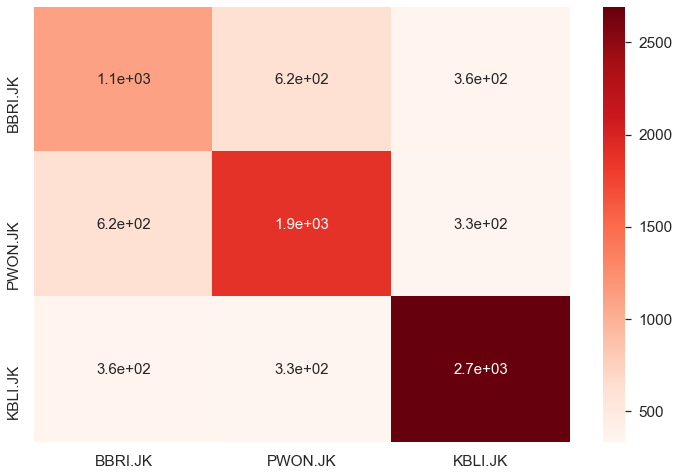

In [30]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(stocks_cov_ann, cmap="Reds", annot = True, annot_kws={"size":15})
plt.show()

Using Log (log_return)

In [31]:
stocks_cov_daily_log = log_return.cov()
stocks_cov_daily_log

,BBRI.JK,PWON.JK,KBLI.JK
BBRI.JK,4.351583,2.423254,1.362781
PWON.JK,2.423254,7.378294,1.315256
KBLI.JK,1.362781,1.315256,10.000037


In [32]:
stocks_cov_ann_log = log_return.cov()*252
stocks_cov_ann_log

,BBRI.JK,PWON.JK,KBLI.JK
BBRI.JK,1096.598957,610.660000,343.420874
PWON.JK,610.660000,1859.330119,331.444425
KBLI.JK,343.420874,331.444425,2520.009277


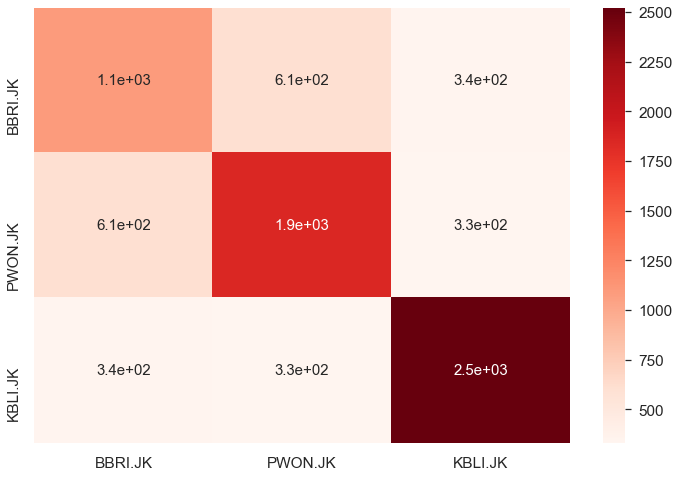

In [33]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(stocks_cov_ann_log, cmap="Reds", annot = True, annot_kws={"size":15})
plt.show()

### Task 6 : Calculate Correlation

$$p(R_i,R_j) = \frac{COV(R_i, R_j)}{\sigma_i \sigma_j}$$

yang perlu diperhatikan adalah tidak corelasi tidak perlu disetahunkan seperti covariance

Using Simple Return (return_daily)

In [34]:
stocks_corr = return_daily.corr()

In [35]:
stocks_corr

,BBRI.JK,PWON.JK,KBLI.JK
BBRI.JK,1.000000,0.428703,0.205751
PWON.JK,0.428703,1.000000,0.147691
KBLI.JK,0.205751,0.147691,1.000000


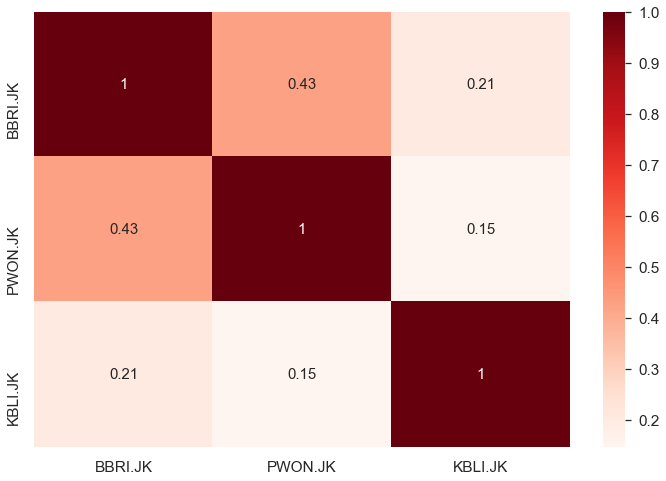

In [36]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(stocks_corr, cmap="Reds", annot = True, annot_kws={"size":15})
plt.show()

## Task 7 : Calculate STD Porto



$$\sigma(R_p) = (w_1^2\sigma^2(R_1) + w_2^2\sigma^2(R_2) + 2w_1w_2p(R_i,R_j)\sigma_i \sigma_j)^.5$$

Using Simple Return (return_daily)

In [37]:
weight = np.array([0.33,0.33,0.33])

In [38]:
pfolio_1_std = np.sqrt((np.dot(weight.T, np.dot(return_daily.cov()*252,weight))))

In [39]:
pfolio_1_std

30.067778817008836

In [40]:
str(round(pfolio_1_std,2)) + ' %'

'30.07 %'

Using log return (return_log)

In [41]:
pfolio_1_std_log = np.sqrt((np.dot(weight.T, np.dot(log_return.cov()*252,weight))))

In [42]:
pfolio_1_std_log

29.60265353938437

In [43]:
str(round(pfolio_1_std_log,2)) + ' %'

'29.6 %'

Risk portofolio dibagi menjadi 2 yaitu systematic dan unsystematic risk, systematic risk adalah resiko pasar (bencana alam, resesi dll) yang tidak bisa dihindari, sedangkan unsystematic risk adalah resiko jenis perushaan dan dapat dihindari, studi menyatakan dengan mengoleksi 20-30 saham pada satu porto yang memiliki corelasi rendah maka resiko unsystematic dapat hilang

### Task 8 : Markowitz Model

Using Simple Return

In [44]:
num_assets = len(ticker)
pfolio_return = []
pfolio_vola = []
p_weights = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    p_weights.append(weights)
    
    pfolio_return.append(np.sum(weights * return_daily.mean()*252))
    pfolio_vola.append(np.sqrt((np.dot(weights.T, np.dot(return_daily.cov()*252,weights)))))
    
pfolio_return = np.array(pfolio_return)
pfolio_vola = np.array(pfolio_vola)

weights

array([0.3238485, 0.345932 , 0.3302195])

In [45]:
data = {'Returns':pfolio_return, 'Volatility':pfolio_vola}

for counter, symbol in enumerate(return_daily.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

    portofolios = pd.DataFrame(data)
# portofolios.index = ['portofolio1']
portofolios

,Returns,Volatility,BBRI.JK weight,PWON.JK weight,KBLI.JK weight
0,19.553736,29.087241,0.573513,0.184991,0.241496
1,21.847284,33.048913,0.219050,0.304741,0.476210
2,17.902435,29.843004,0.530407,0.357375,0.112218
3,23.187508,35.603522,0.221994,0.192607,0.585399
4,21.414383,31.002007,0.463009,0.128652,0.408339
...,...,...,...,...,...
995,22.208475,32.630930,0.380542,0.135213,0.484244
996,18.752999,33.591642,0.146770,0.620398,0.232832
997,16.793422,31.468489,0.559373,0.422941,0.017686
998,20.977502,34.973151,0.036647,0.533979,0.429375


In [46]:
portofolios.head()

,Returns,Volatility,BBRI.JK weight,PWON.JK weight,KBLI.JK weight
0,19.553736,29.087241,0.573513,0.184991,0.241496
1,21.847284,33.048913,0.219050,0.304741,0.476210
2,17.902435,29.843004,0.530407,0.357375,0.112218
3,23.187508,35.603522,0.221994,0.192607,0.585399
4,21.414383,31.002007,0.463009,0.128652,0.408339


In [47]:
portofolios.tail()

,Returns,Volatility,BBRI.JK weight,PWON.JK weight,KBLI.JK weight
995,22.208475,32.630930,0.380542,0.135213,0.484244
996,18.752999,33.591642,0.146770,0.620398,0.232832
997,16.793422,31.468489,0.559373,0.422941,0.017686
998,20.977502,34.973151,0.036647,0.533979,0.429375
999,20.232384,30.435628,0.323849,0.345932,0.330220


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


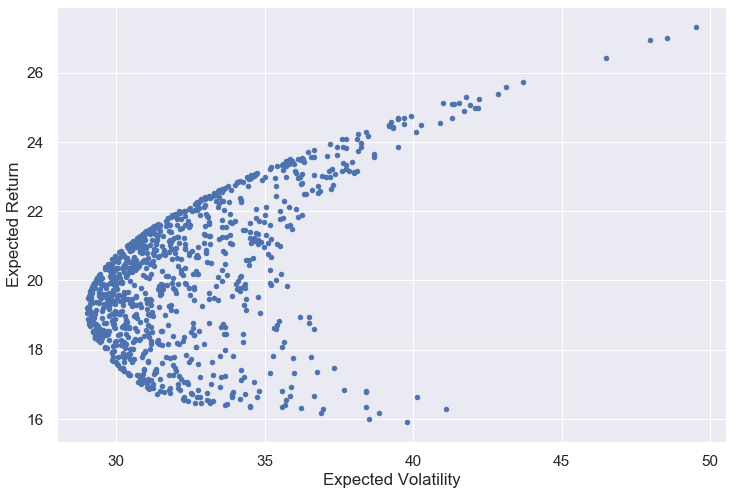

In [48]:
portofolios.plot.scatter(x = "Volatility", y = "Returns");
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.show()

### Task 9 : Global Minimum Volatility

In [49]:
min_vol_por = portofolios.iloc[portofolios['Volatility'].idxmin()]
min_vol_por

Returns           19.196617
Volatility        29.012646
BBRI.JK weight     0.573319
PWON.JK weight     0.214358
KBLI.JK weight     0.212323
Name: 628, dtype: float64

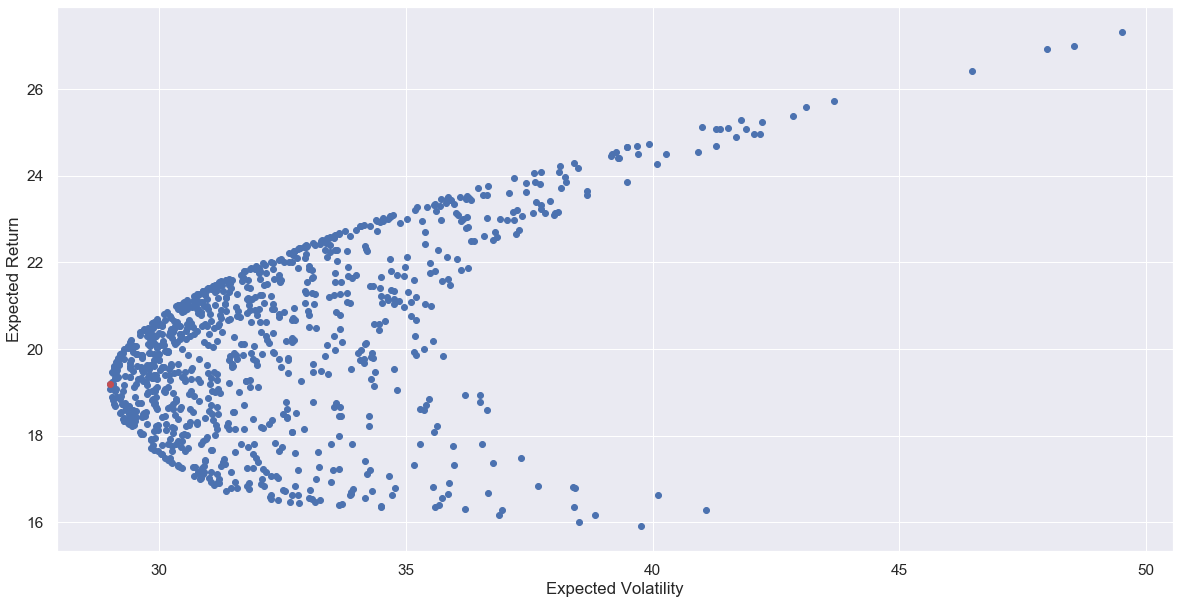

In [50]:
plt.subplots(figsize = (20,10))
plt.scatter(portofolios['Volatility'], portofolios['Returns']);
plt.scatter(min_vol_por[1], min_vol_por[0], color = 'r')
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.show()

### Task 10 : Optimal Risky POrtofolio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

adalah nilai maksimal dari "Sharpe Ratio"

In [51]:
rf = 0.06

In [52]:
((portofolios['Returns']-rf)/portofolios['Volatility']).idxmax()

37

In [53]:
optmal_ris_por = portofolios.iloc[((portofolios['Returns']-rf)/portofolios['Volatility']).idxmax()]

In [54]:
optmal_ris_por

Returns           21.025472
Volatility        30.395998
BBRI.JK weight     0.468608
PWON.JK weight     0.155597
KBLI.JK weight     0.375795
Name: 37, dtype: float64

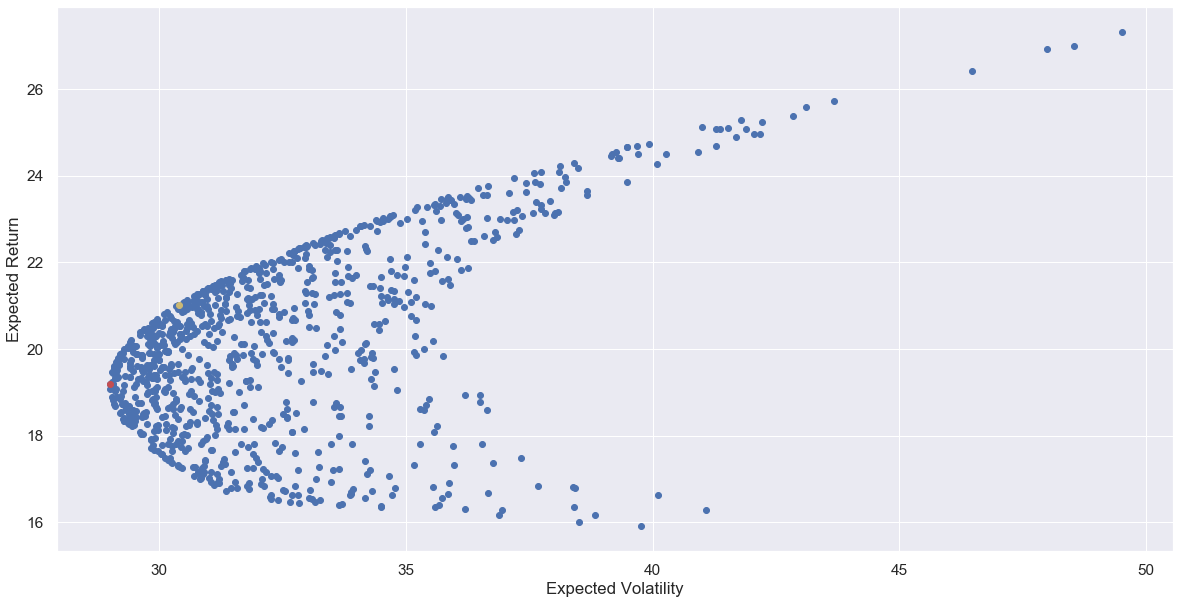

In [55]:
plt.subplots(figsize = (20,10))
plt.scatter(portofolios['Volatility'], portofolios['Returns']);
plt.scatter(min_vol_por[1], min_vol_por[0], color = 'r')
plt.scatter(optmal_ris_por[1], optmal_ris_por[0], color = 'y')
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.show()

In [56]:
portofolios.iloc[portofolios['Returns'].idxmax()]

Returns           27.321818
Volatility        49.505567
BBRI.JK weight     0.048424
PWON.JK weight     0.005036
KBLI.JK weight     0.946540
Name: 856, dtype: float64

### Task 11 : Utility Function

$$U = E(R)-0.5A\sigma^2$$

### Task 11 : Capital allocation Line

$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

In [57]:
cal_x = []
cal_y = []
utility = []
a = 0.06

In [58]:
for er in np.linspace(rf, max(pfolio_return), 20):
    sd = (er-rf)/((optmal_ris_por[0]-rf)/optmal_ris_por[1])
    u = er - 0.5 *a*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)

In [59]:
data2 = {'utility':utility, 'cal_y':cal_y, "cal_x":cal_x}
cal = pd.DataFrame(data2)
cal.head()

,utility,cal_y,cal_x
0,0.060000,0.060000,0.000000
1,1.365011,1.494833,2.080238
2,2.410378,2.929665,4.160476
3,3.196102,4.364498,6.240713
4,3.722183,5.799330,8.320951


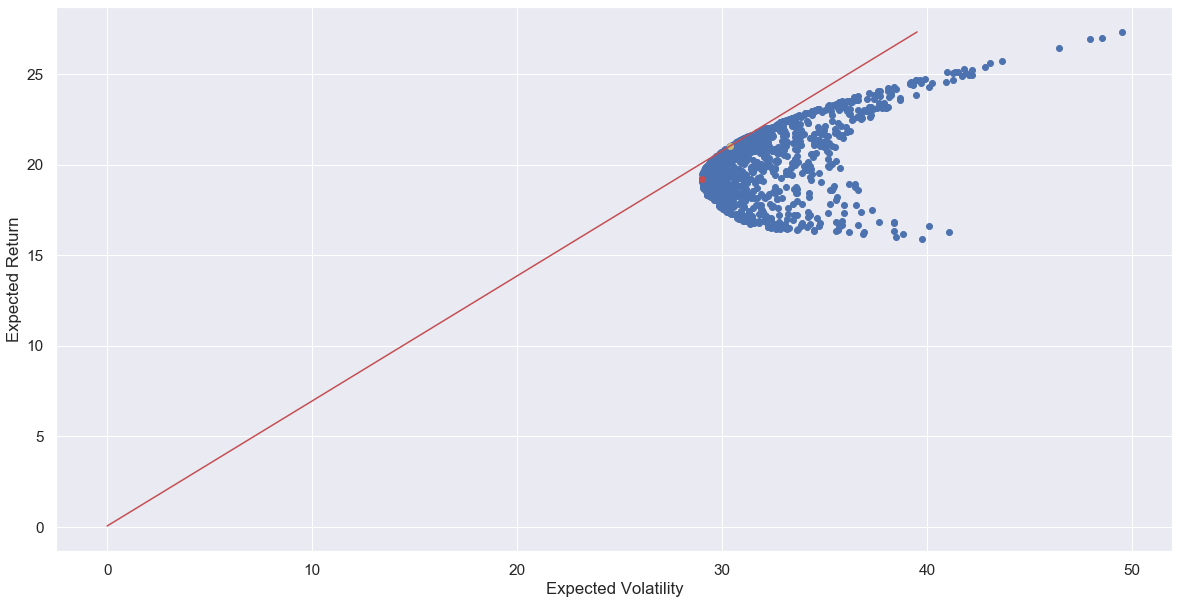

In [60]:
plt.subplots(figsize = (20,10))
plt.scatter(portofolios['Volatility'], portofolios['Returns']);
plt.scatter(min_vol_por[1], min_vol_por[0], color = 'r')
plt.scatter(optmal_ris_por[1], optmal_ris_por[0], color = 'y')
plt.plot(cal_x,cal_y, color = 'r')
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.show()

### Task 12 : Investor Optimal Portofolio

In [61]:
cal['utility'].idxmax()

6

In [62]:
investors_port = cal.iloc[cal['utility'].idxmax()]

In [63]:
investors_port

utility     3.995415
cal_y       8.668995
cal_x      12.481427
Name: 6, dtype: float64

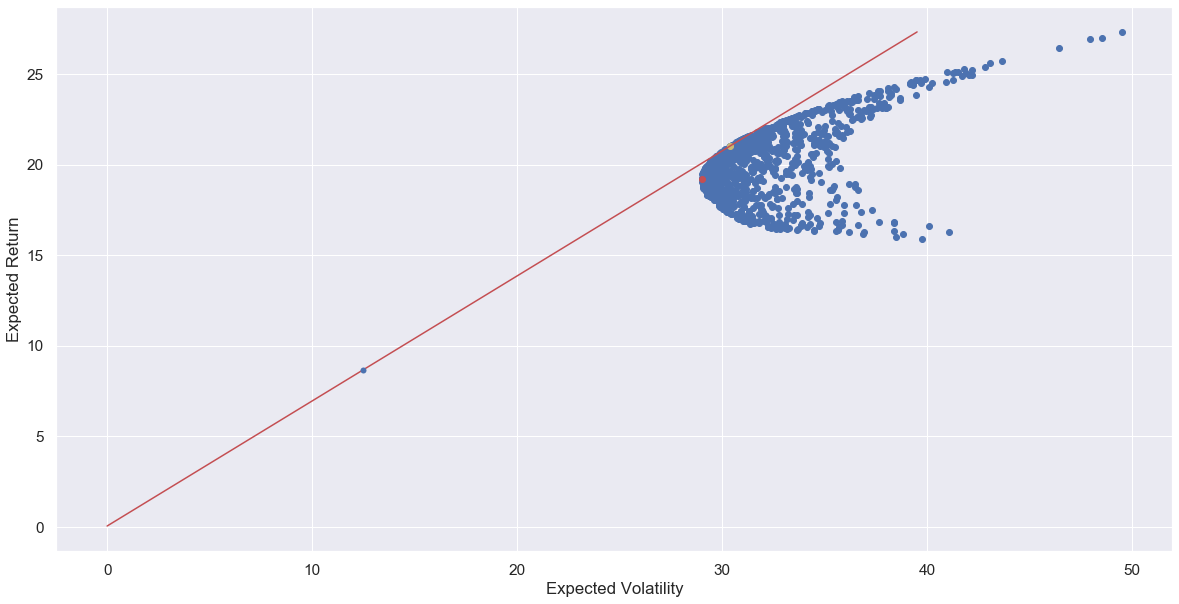

In [64]:
plt.subplots(figsize = (20,10))
plt.scatter(portofolios['Volatility'], portofolios['Returns']);
plt.scatter(min_vol_por[1], min_vol_por[0], color = 'r')
plt.scatter(optmal_ris_por[1], optmal_ris_por[0], color = 'y')
plt.plot(cal_x,cal_y, color = 'r')
plt.plot(investors_port[2],investors_port[1],'o',color = 'b')
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.show()